In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

Churn refers to the situation where a customer of a company stops using its product and leaves the company. Churn
can be anything—employee churn from a company, customer churn from a mobile subscription, and so on.



## Case: Comparing Predictions by Linear and Logistic Regression on the Shill Bidding Dataset

Consider the Shill_Bidding_Dataset.csv dataset, which contains details regarding auctions done for various products on eBay.com. The target column, Class, provides information about the bidding behavior, 0 being normal and 1 being abnormal behavior. Abnormal behavior can be similar to malicious clicks or automatic bidding. You have been asked to develop a machine learning model that can predict whether the bidding behavior in a particular auction is normal (0) or not (1).

In [49]:
data = pd.read_csv('./dataset/Shill_Bidding_Dataset.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB
None


Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [50]:
# Remove columns that irrelevent to the study case

data.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1, inplace=True)
data.head()

Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
0         0.200000       0.400000                    0.0      0.000028   
1         0.024390       0.200000                    0.0      0.013123   
2         0.142857       0.200000                    0.0      0.003042   
3         0.100000       0.200000                    0.0      0.097477   
4         0.051282       0.222222                    0.0      0.001318   

   Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  \
0           0.0                0.993593       0.000028       0.666667   
1           0.0                0.993593       0.013123       0.944444   
2           0.0                0.993593       0.003042       1.000000   
3           0.0                0.993593       0.097477       1.000000   
4           0.0                0.000000       0.001242       0.500000   

   Auction_Duration  Class  
0                 5      0  
1                 5      0  
2                 5      0  
3                 5      0  
4                 7      0

In [51]:
from sklearn.model_selection import train_test_split
# Create train and test dataset

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print(f"Training dataset size: {X_train.shape}, Testing dataset size: {X_test.shape}")

Training dataset size: (4424, 9), Testing dataset size: (1897, 9)


In [52]:
# Let see result from LinearRegression perspective

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print(f"The first prediction result: {linear.predict(X_test)[:10]}\n")
print(f"The first actual result: {y_test[:10].values}\n")
print(f"Score on training dataset: {linear.score(X_train,y_train)}, "
      f"Score on testing dataset: {linear.score(X_test,y_test)}")

The first prediction result: [-0.00375542 -0.00248633 -0.01090699 -0.02753235  0.01939224  0.99493654
  0.02761226 -0.00565047  0.48101551  0.00471959]

The first actual result: [0 0 0 0 0 1 0 0 0 0]

Score on training dataset: 0.8166836356918418, Score on testing dataset: 0.8119909602893054


In [53]:
# Using LogisticRegression

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

print(f"The first prediction result: {logit.predict(X_test)[:10]}\n")
print(f"The first actual result: {y_test[:10].values}\n")
print(f"Score on training dataset: {logit.score(X_train,y_train)}, "
      f"Score on testing dataset: {logit.score(X_test,y_test)}")

The first prediction result: [0 0 0 0 0 1 0 0 0 0]

The first actual result: [0 0 0 0 0 1 0 0 0 0]

Score on training dataset: 0.9794303797468354, Score on testing dataset: 0.9715340010542962


## Case: Churn Prediction Bank

- As a data scientist, we are tasked with finding out the reasons behind customer churn and predicting future customer churn. 
- The marketing team is interested in your findings and wants to better understand existing customer behavior and possibly predict future customer churn. 
- Your results will help the marketing team to use their budget wisely to target potential churners.

In [54]:
data = pd.read_csv('./dataset/Churn_Modelling.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB
None


CustomerId  CredRate Geography  Gender   Age  Tenure    Balance  \
0    15634602       619    France  Female  42.0       2       0.00   
1    15647311       608     Spain  Female  41.0       1   83807.86   
2    15619304       502    France  Female  42.0       8  159660.80   
3    15701354       699    France  Female  39.0       1       0.00   
4    15737888       850     Spain  Female  43.0       2  125510.82   

   Prod Number  HasCrCard  ActMem  EstimatedSalary  Exited  
0            1          1       1        101348.88       1  
1            1          0       1        112542.58       0  
2            3          1       0        113931.57       1  
3            2          0       0         93826.63       0  
4            1          1       1         79084.10       0

In [55]:
# Summarize contains null fields
print('Proportion gender: \n', data['Gender'].value_counts())
data[['EstimatedSalary', 'Age']].describe()

Proportion gender: 
 Gender
Male      5453
Female    4543
Name: count, dtype: int64


EstimatedSalary          Age
count      9996.000000  9994.000000
mean     100074.744083    38.925255
std       57515.774555    10.489248
min          11.580000    18.000000
25%       50974.077500    32.000000
50%      100168.240000    37.000000
75%      149388.247500    44.000000
max      199992.480000    92.000000

In [56]:
# Scrubbing The Data

# Imputing Missing Values
mean_value = data['EstimatedSalary'].mean()
mode_gender = data['Gender'].mode()[0]
mode_age = data['Age'].mode()[0]
data['EstimatedSalary'] = data['EstimatedSalary'].fillna(mean_value)
data['Gender'] = data['Gender'].fillna(mode_gender)
data['Age'] = data['Age'].fillna(mode_age)

print(data.isnull().any())

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool


In [57]:
# Renaming data type

data = data.rename(columns={'CredRate': 'CreditScore',
                            'ActMem': 'IsActiveMember',
                            'Prod Number': 'NumOfProducts',
                            'Exited': 'Churn'})

# Drop customerID and put churn on the right table
data.drop(labels=['CustomerId'], axis=1, inplace=True)
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1, inplace=True)
data.insert(len(data.columns), 'Churn', column_churn.values)

print(data.columns)

# Change data types
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['HasCrCard'] = data['HasCrCard'].astype('category')
data['Churn'] = data['Churn'].astype('category')
data['IsActiveMember'] = data['IsActiveMember'].astype('category')

print(data.info())

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  float64 
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Churn            10000 non-null  category
dtypes: category(5), float64(3), int64(3)
memory usage: 518.3 KB
None


**Exploratory Data Analysis**

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.004179  0.000842  0.006268       0.012238   
Age                -0.004179  1.000000 -0.009996  0.028141      -0.030590   
Tenure              0.000842 -0.009996  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028141 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030590  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001352 -0.007215  0.007407  0.013129       0.014132   

                 EstimatedSalary  
CreditScore            -0.001352  
Age                    -0.007215  
Tenure                  0.007407  
Balance                 0.013129  
NumOfProducts           0.014132  
EstimatedSalary         1.000000

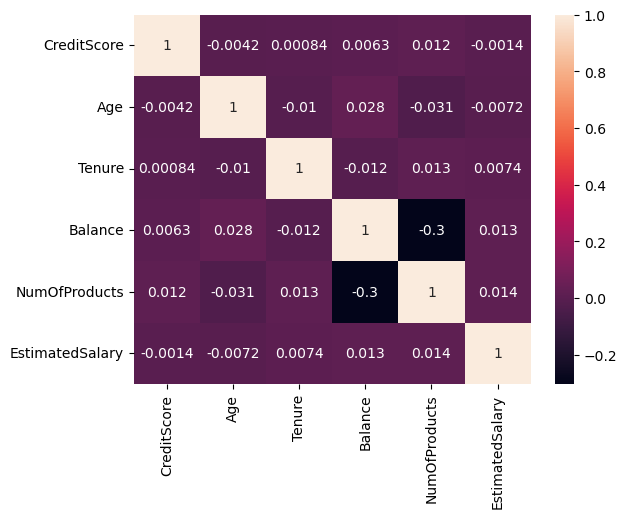

In [71]:
# Correlation

corr = data.corr(numeric_only=True)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

corr

NOTES:
- A word of warning for interpreting the results of the correlation. Correlation does not imply causation. Even if the matrix shows a relationship, do not assume that one variable caused the other. Both may be influenced by a third variable.
- This observations good for initial statistical review.

In [62]:
# Statistical overview

print("Value counts churn: ", data['Churn'].value_counts())
print("Percentage churn: ", data['Churn'].value_counts(normalize=1) * 100)
print("Percentage Has Credit Card: ", data['HasCrCard'].value_counts(normalize=1) * 100)


Value counts churn:  Churn
0    7963
1    2037
Name: count, dtype: int64
Percentage churn:  Churn
0    79.63
1    20.37
Name: proportion, dtype: float64
Percentage Has Credit Card:  HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64


NOTES:
- The proportion of customers that churned is 20.37% (2,037), and the proportion of those that did not churn is 79.63% (7,963)

In [63]:
data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.924100      5.012800   76485.889288       1.530200   
std       96.653299     10.486207      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary  
count     10000.000000  
mean     100074.744083  
std       57504.269099  
min          11.580000  
25%       51002.110000  
50%      100134.325000  
75%      149382.097500  
max      199992.480000

In [68]:
num_fields = [c for c in data.columns if data[c].dtype != 'category']
summary_churn = data.groupby('Churn', observed=True)[num_fields]
print("Summary Mean:")
summary_churn.mean()

Summary mean:


CreditScore        Age    Tenure       Balance  NumOfProducts  \
Churn                                                                  
0       651.853196  37.411277  5.033279  72745.296779       1.544267   
1       645.351497  44.837997  4.932744  91108.539337       1.475209   

       EstimatedSalary  
Churn                   
0         99718.932023  
1        101465.677531

In [69]:
print("Summary Median:")
summary_churn.median()

Summary Median:


CreditScore   Age  Tenure    Balance  NumOfProducts  EstimatedSalary
Churn                                                                      
0            653.0  36.0     5.0   92072.68            2.0         99645.04
1            646.0  45.0     5.0  109349.29            1.0        102460.84

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\1385512270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.EstimatedSalary, kde=True, color='gray',
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\1385512270.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

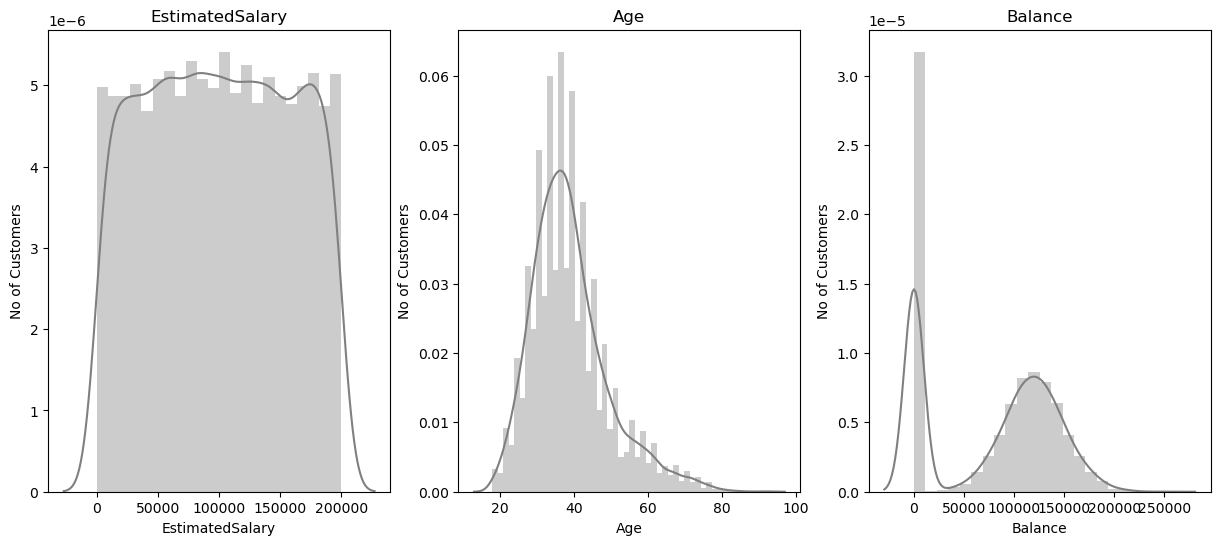

In [97]:
# Visualizing the data

f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.EstimatedSalary, kde=True, color='gray',
             ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')

sns.distplot(data.Age, kde=True, color='gray',
            ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')

sns.distplot(data.Balance, kde=True, color='gray',
             ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

plt.show()

NOTES:
- EstimatedSalary: The distribution of the estimates salary seems to be a plateau distribution - meaning that for a significant range of estimated salary, the number of customers is more or less constant.

- Age: This has a normal distribution that is right-skewed. Most customers lie in the range of 30-45 years of age.

- Balance: This has a bimodal distribution - this means that there exist two values of balance for which the number of customers is unusually high. A considerable number of customers with a low balance are there, which seems to be an outliers.

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


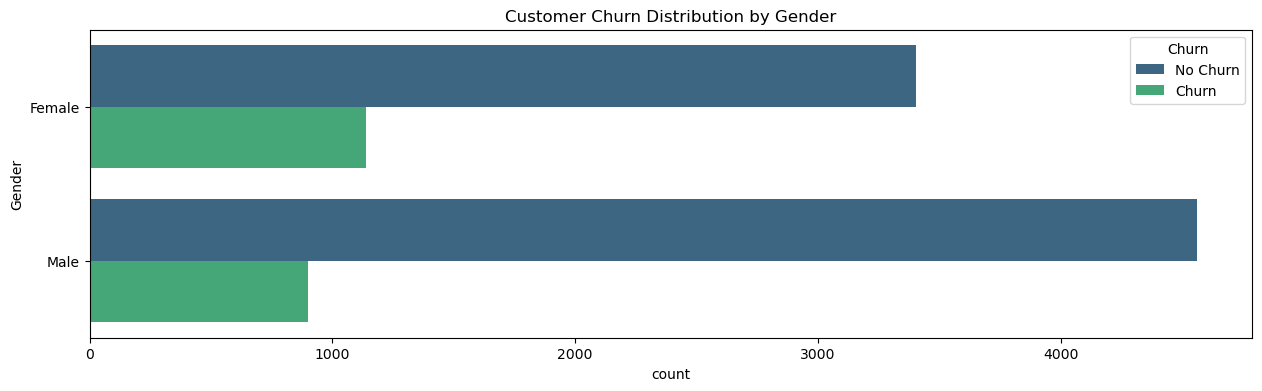

In [84]:
plt.figure(figsize=(15, 4))
p = sns.countplot(y='Gender', hue='Churn', data=data, palette='coolwarm')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title("Customer Churn Distribution by Gender")
plt.show()

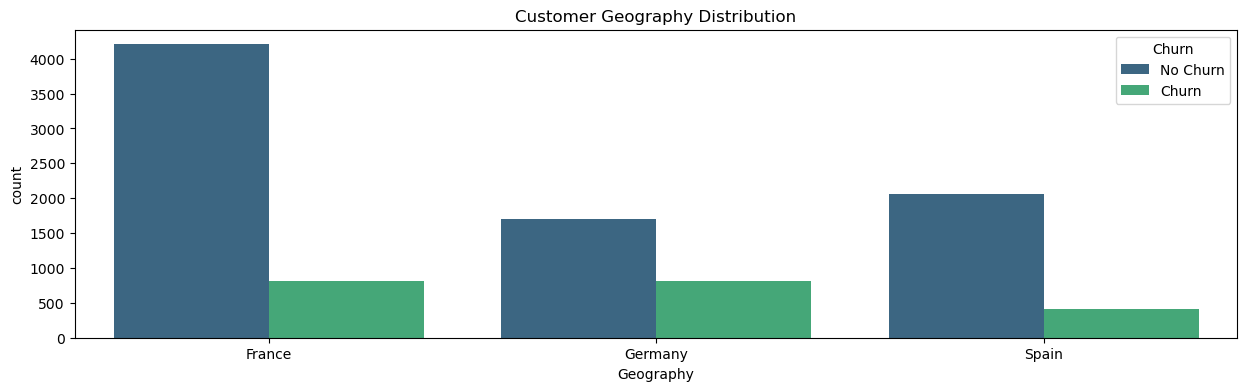

In [85]:
plt.figure(figsize=(15, 4))
p = sns.countplot(x='Geography', hue='coolwarm', data=data,
                  palette='viridis')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title("Customer Geography Distribution")
plt.show()

NOTE:
- The difference between the number of customers that churned and those that did not churn is less for Germany and Spain in comparison with France. France has the highest number of customers compared to the other countries.

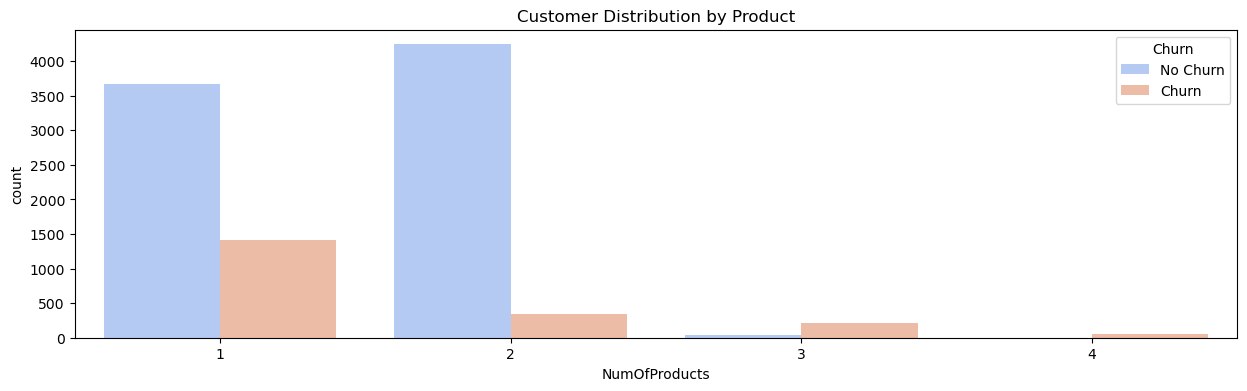

In [87]:
plt.figure(figsize=(15, 4))
p = sns.countplot(x='NumOfProducts', hue='Churn', data=data,
                  palette='coolwarm')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Customer Distribution by Product')
plt.show()

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\669445275.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Age'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\669445275.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Age'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

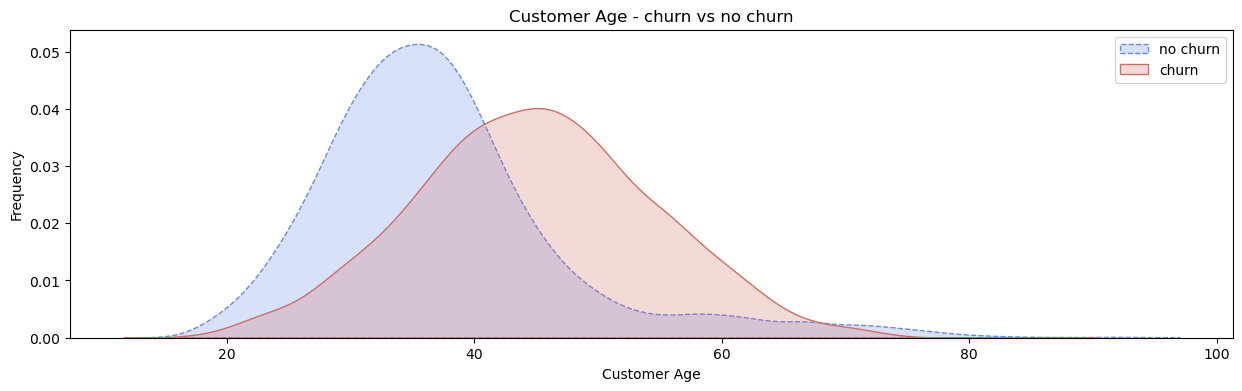

In [91]:
plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Age'],
                 color=sns.color_palette('coolwarm')[0],
                 shade=True, label='no churn',
                 linestyle='--')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Age'],
                 color=sns.color_palette('dark:salmon_r')[1],
                 shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title("Customer Age - churn vs no churn")
plt.legend()

NOTES:
- Customers in the 35 to 45 age group seem to churn more. As the age of customers increases, they usually churn more.

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\34980218.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Balance'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\34980218.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Balance'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

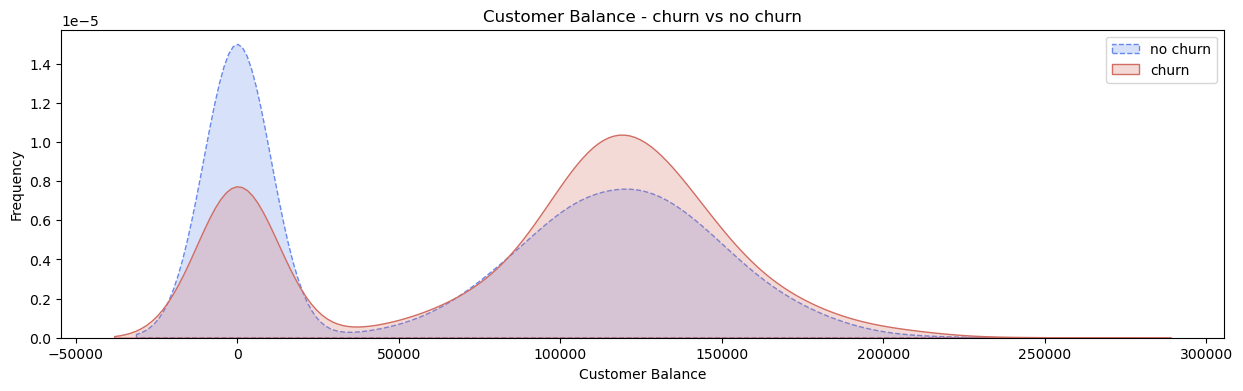

In [92]:
plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'Balance'],
                 color=sns.color_palette('coolwarm')[0],
                 shade=True, label='no churn',
                 linestyle='--')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'Balance'],
                 color=sns.color_palette('dark:salmon_r')[1],
                 shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title("Customer Balance - churn vs no churn")
plt.legend()

NOTES:
- Customers with a negative to low balance churn less than customers with a balance between 75,000 and 150,000.

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\2872523411.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'CreditScore'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_9516\2872523411.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'CreditScore'],
C:\Users\Baha Tegar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

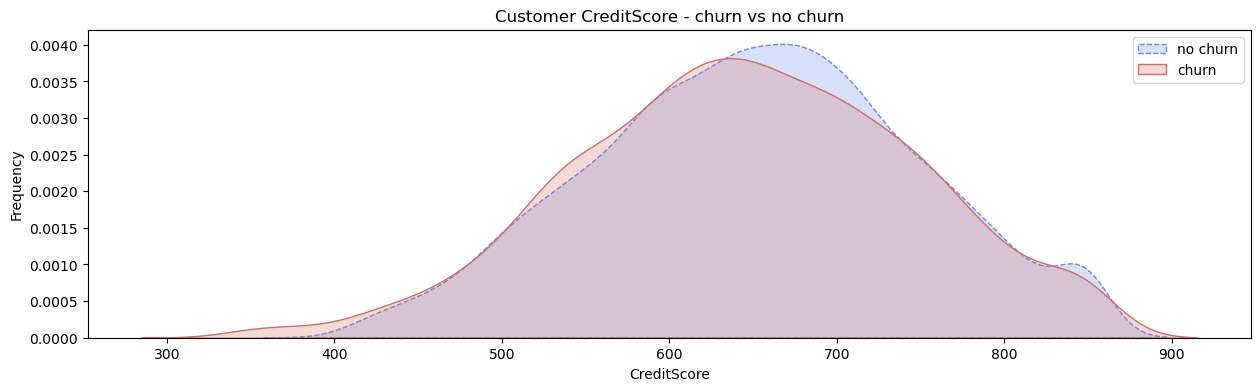

In [94]:
plt.figure(figsize=(15, 4))
ax = sns.kdeplot(data.loc[(data['Churn'] == 0), 'CreditScore'],
                 color=sns.color_palette('coolwarm')[0],
                 shade=True, label='no churn',
                 linestyle='--')
ax = sns.kdeplot(data.loc[(data['Churn'] == 1), 'CreditScore'],
                 color=sns.color_palette('dark:salmon_r')[1],
                 shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title("Customer CreditScore - churn vs no churn")
plt.legend()
plt.show()

Notes:
- Notice that the largest proportion of customers who churned have a credit score around 600, whereas those who didn't have a credit score around 650

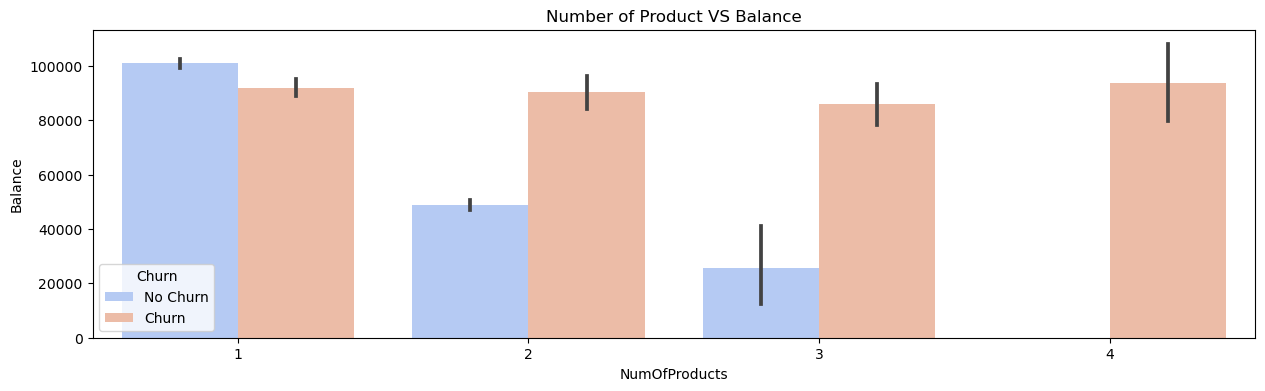

In [96]:
plt.figure(figsize=(15, 4))
p = sns.barplot(x='NumOfProducts', y='Balance', hue='Churn', data=data,
                  palette='coolwarm')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text('No Churn')
legend_txt[1].set_text('Churn')
p.set_title('Number of Product VS Balance')
plt.show()

NOTES :
- It appears that as the number of products increases, the balance for churned customers remains very high.

**Performing Feature Selection**

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Encoding the categorical variables
data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data['HasCrCard'] = data['HasCrCard'].astype('category').cat.codes
data['Churn'] = data['Churn'].astype('category').cat.codes

data.head()

CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619          0       0  42.0       2       0.00              1   
1          608          2       0  41.0       1   83807.86              1   
2          502          0       0  42.0       8  159660.80              3   
3          699          0       0  39.0       1       0.00              2   
4          850          2       0  43.0       2  125510.82              1   

   HasCrCard IsActiveMember  EstimatedSalary  Churn  
0          1              1        101348.88      1  
1          0              1        112542.58      0  
2          1              0        113931.57      1  
3          0              0         93826.63      0  
4          1              1         79084.10      0

In [99]:
# Split the data into training and testing

target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                    random_state=123,
                                                    stratify=y)

RandomForestClassifier(n_estimators=500, random_state=1)

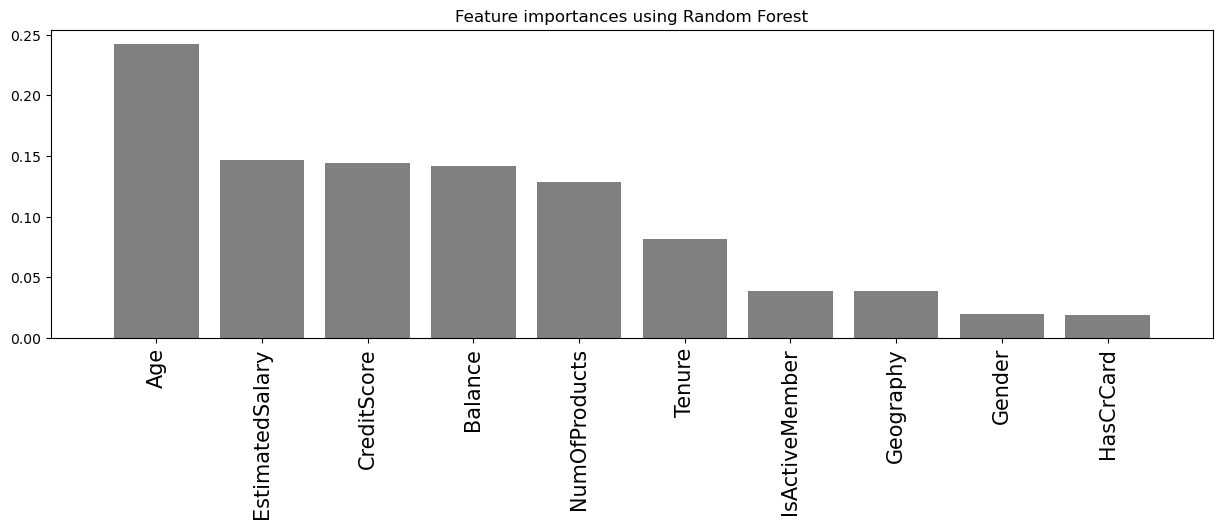

In [100]:
# Get feature importances from random forest

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances=forest.feature_importances_
features = data.drop(['Churn'], axis=1).columns
indices = np.argsort(importances)[::-1]

# Plot the importances result
plt.figure(figsize=(15, 4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
        color='gray', align='center')
plt.xticks(range(X_train.shape[1]), features[indices],
           rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [106]:
feature_importance_df = pd.DataFrame({"Feature":features,
                                      "Importance":importances})
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.143886
1        Geography    0.038548
2           Gender    0.019299
3              Age    0.241954
4           Tenure    0.081503
5          Balance    0.141760
6    NumOfProducts    0.128461
7        HasCrCard    0.019139
8   IsActiveMember    0.038878
9  EstimatedSalary    0.146571


**Model Building**

In [107]:
# Using statsmodels package

import statsmodels.api as sm

top5_features = ['Age', 'EstimatedSalary', 'CreditScore',
                 'Balance', 'NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [110]:
logistic_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8500
Model:                          Logit   Df Residuals:                     8495
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Jun 2024   Pseudo R-squ.:                 0.06437
Time:                        14:43:52   Log-Likelihood:                -4019.5
converged:                       True   LL-Null:                       -4296.0
Covariance Type:            nonrobust   LLR p-value:                2.199e-118
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0483      0.002     20.655      0.000       0.044       0.053
EstimatedSalary -1.028e-06   4.77e-07     -2.156      0.031   -1.96e-06   -9.34e-08
CreditScore        -0.0045      0.000    -23.381      0.000      -0.005      -0.004
Balance          2.884e-06   4.62e-07      6.245      0.000    1.98e-06    3.79e-06
NumOfProducts      -0.3617      0.048     -7.599      0.000      -0.455      -0.268
===================================================================================
"""

In [111]:
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [113]:
# Try the result model

# Create a function to compute the coefficients
coef = logistic_regression.params

def y (coef, Age, EstimatedSalary, CreditScore, Balance, NumOfProducts):
    return (coef.iloc[0]*Age + coef.iloc[1]*EstimatedSalary + 
            coef.iloc[2]*CreditScore + coef.iloc[3]*Balance + 
            coef.iloc[4]*NumOfProducts)

input_data = {
    'Age': 50,
    'EstimatedSalary': 100_000,
    'CreditScore': 600,
    'Balance': 100_000,
    'NumOfProducts': 2,
}

y1 = y(coef, input_data['Age'],
       input_data['EstimatedSalary'], input_data['CreditScore'],
       input_data['Balance'], input_data['NumOfProducts'])
p = np.exp(y1) / (1 + np.exp(y1))
print("Probability: ", p)

Probability:  0.3093646023640836


In [119]:
# Using sklearn

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train)

clf.predict(X_test[top5_features])
clf.predict_proba(X_test[top5_features])

clf.score(X_test[top5_features], y_test)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7846666666666666

**Summary**

- The percentage of customers that churned is 20.37% (2,037) and the percentage that did not churn is 79.63% (7,963).
- Overall, the average credit score of the customers who churned is 645.35 and the average age of the customers who churned is 44.83 years.
- The average balance and the estimated salary of the customers who churned are 911,108.53 and 101,465.67 respectively, which is greater than the customers who didn't churn.
- The median number of products purchased by the customers who churned is 1.
- Customer age and churn are 29% positively correlated.
- Balance and churn are 12% positively correlated.
- The number of products purchased and the customer's balance are 30% negatively correlated.
- The difference between churn and non-churning customers in Germany and Spain is less than in France.
- Comparatively, more female customers have churned. The amount of churn is greater for customers who have purchased 3-4 products.
- Customers within the 35-45 age group seem to churn more. As the age of customers increases, they usually churn more.
- The amount of churn is less with customers with a negative to low balance compared to customers having a balance of 75,000–150,000.
- The most important features selected from tree-based feature selection are Age, EstimatedSalary, CreditScore, Balance, and NumOfProducts.